## Libraries and functions

In [1]:
import os
from PIL import Image
from matplotlib import pyplot as plt
import os
from PIL import Image
import random
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from sklearn.metrics import f1_score, precision_score, recall_score
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader, Dataset


In [2]:
# Function to print images from the provided path
def load_images_from_folder(folder_path, label, percentage):
    print(f"Loading {percentage*100}% of images from class {label}")
    images = []
    file_list = os.listdir(folder_path)
    random.shuffle(file_list)
    for img in file_list[:int(len(file_list)*percentage)]:
        img_path = os.path.join(folder_path, img)
        image = Image.open(img_path)
        images.append((image, label))
    return images

In [3]:
class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, label = self.data[idx]
        if self.transform:
            image = self.transform(image)
        return image, label
    

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [4]:
def load_images_for_testing(folder_path, percentage):
    print(f"Loading {percentage*100}% of images from {folder_path} for testing")
    images = []
    file_list = os.listdir(folder_path)
    random.shuffle(file_list)
    for img in file_list[:int(len(file_list)*percentage)]:
        img_path = os.path.join(folder_path, img)
        image = Image.open(img_path)
        images.append(image)
    return images

In [5]:
def close_images(images):
    for img, _ in images:
        img.close()

## Data Initialization

In [71]:
import os
from PIL import Image

# Define the paths for the two folders
folder_correct = r'D:\techosmotr\techosmotr\train\pravilniye(correct)'
folder_fictitious = r'D:\techosmotr\techosmotr\train\fictivniye(fictitious)'

# Function to print images from the provided path
def print_images_from_folder(folder_path, label):
    print(f"Printing image from class {label}")
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        image = Image.open(img_path)
        image.show()
        break  # Break after showing one image

# Print one image from each class
print_images_from_folder(folder_correct, 1)
print_images_from_folder(folder_fictitious, 0)


Printing image from class 1
Printing image from class 0


Printing image from class 0


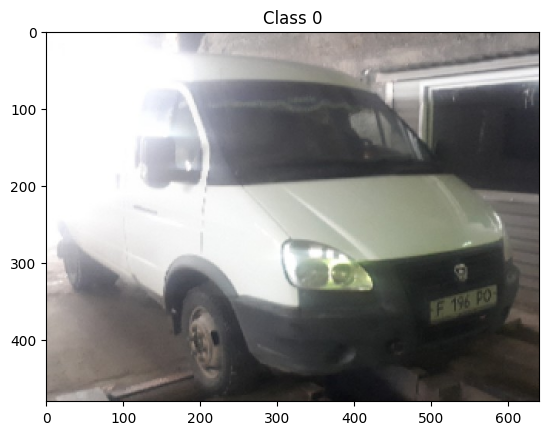

Printing image from class 1


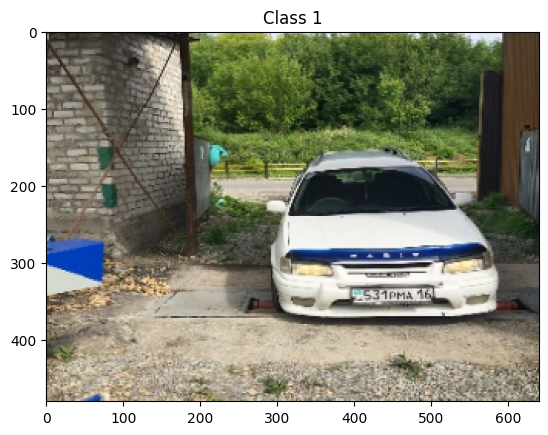

In [72]:
import os
from PIL import Image
from matplotlib import pyplot as plt


# Function to print images from the provided path
def print_images_from_folder(folder_path, label):
    print(f"Printing image from class {label}")
    fig, ax = plt.subplots()
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        image = Image.open(img_path)
        ax.imshow(image)
        ax.set_title(f"Class {label}")
        plt.show()
        break  # Break after showing one image

# Print one image from each class
print_images_from_folder(folder_correct, 0)
print_images_from_folder(folder_fictitious, 1)


In [3]:
import os
from PIL import Image
import random

# Function to print images from the provided path
def load_images_from_folder(folder_path, label, percentage):
    print(f"Loading {percentage*100}% of images from class {label}")
    images = []
    file_list = os.listdir(folder_path)
    random.shuffle(file_list)
    for img in file_list[:int(len(file_list)*percentage)]:
        img_path = os.path.join(folder_path, img)
        image = Image.open(img_path)
        images.append((image, label))
    return images

In [76]:
percentage = 0.1
images_correct = load_images_from_folder(folder_correct, 0, percentage)
percentage = 0.2
images_fictitious = load_images_from_folder(folder_fictitious, 1, percentage)

Loading 10.0% of images from class 0
Loading 20.0% of images from class 1


In [77]:
from sklearn.model_selection import train_test_split

# Combine the two lists
images_all = images_correct + images_fictitious
labels_all = [label for _, label in images_all]

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images_all, labels_all, test_size=0.2, random_state=42)

# Extract data and labels separately for training and testing
train_data = [image for image, _ in train_images]
train_labels = [label for _, label in train_images]
test_data = [image for image, _ in test_images]
test_labels = [label for _, label in test_images]

# Verify the lengths of the train and test data
print(f"Length of train data: {len(train_data)}")
print(f"Length of test data: {len(test_data)}")


Length of train data: 691
Length of test data: 173


In [78]:
# Show the number of occurrences of class 0 and class 1 in train_labels
num_class_0_train = train_labels.count(0)
num_class_1_train = train_labels.count(1)

# Show the number of occurrences of class 0 and class 1 in test_labels
num_class_0_test = test_labels.count(0)
num_class_1_test = test_labels.count(1)

# Print the results
print(f"Number of class 0 in train_labels: {num_class_0_train}")
print(f"Number of class 1 in train_labels: {num_class_1_train}")
print(f"Number of class 0 in test_labels: {num_class_0_test}")
print(f"Number of class 1 in test_labels: {num_class_1_test}")


Number of class 0 in train_labels: 364
Number of class 1 in train_labels: 327
Number of class 0 in test_labels: 88
Number of class 1 in test_labels: 85


In [79]:
train_data

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x720>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x720>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720>,
 <PIL

In [80]:
# Create datasets
train_data = list(zip(train_data, train_labels))
test_data = list(zip(test_data, test_labels))

## Resnet 50

In [8]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader, Dataset
from PIL import Image


c:\Users\kuany\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [82]:
class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, label = self.data[idx]
        if self.transform:
            image = self.transform(image)
        return image, label
    

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_data = CustomDataset(train_data, transform=transform)
test_data = CustomDataset(test_data, transform=transform)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)


In [83]:
resnet50 = models.resnet50(pretrained=True)

# Freeze all layers except the final classification layer
for param in resnet50.parameters():
    param.requires_grad = False

# Modify the final classification layer for binary classification
num_ftrs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 2)
)


In [84]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet50.parameters(), lr=0.001)


In [85]:
num_epochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet50.to(device)

for epoch in range(num_epochs):
    resnet50.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet50(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

print("Training complete")


Epoch 1/5, Loss: 0.7103522257371382
Epoch 2/5, Loss: 0.48759455707940186
Epoch 3/5, Loss: 0.4268938113342632
Epoch 4/5, Loss: 0.35979466275735333
Epoch 5/5, Loss: 0.34980884058908984
Training complete


In [86]:


resnet50.eval()
correct = 0
total = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet50(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
precision = precision_score(all_labels, all_predicted, average='macro')
recall = recall_score(all_labels, all_predicted, average='macro')
f1 = 100 * 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Test Accuracy: {accuracy}%")
print(f"F1 Score: {f1}%")



Test Accuracy: 84.39306358381504%
F1 Score: 85.19792607592021%


In [87]:
def close_images(images):
    for img, _ in images:
        img.close()


close_images(images_correct)
close_images(images_fictitious)
# close_images(images_corr_all)
# close_images(images_fict_all)

In [88]:
percentage = 0.2
images_corr_all = load_images_from_folder(folder_correct, 0, percentage)
percentage = 0.4
images_fict_all = load_images_from_folder(folder_fictitious, 1, percentage)
images_all_test = images_corr_all + images_fict_all
labels_all_test = [label for _, label in images_all_test]

Loading 20.0% of images from class 0
Loading 40.0% of images from class 1


In [89]:
# Show the number of occurrences of class 0 and class 1 in train_labels
num_class_0_train = labels_all_test.count(0)
num_class_1_train = labels_all_test.count(1)


# Print the results
print(f"Number of class 0 in all_labels: {num_class_0_train}")
print(f"Number of class 1 in all_labels: {num_class_1_train}")

Number of class 0 in all_labels: 904
Number of class 1 in all_labels: 824


In [90]:
image_all_data = CustomDataset(images_all_test, transform=transform)

batch_size = 32
image_all_loader = DataLoader(image_all_data, batch_size=batch_size)

In [91]:
from sklearn.metrics import f1_score, precision_score, recall_score

resnet50.eval()
correct = 0
total = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for inputs, labels in image_all_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet50(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
precision = precision_score(all_labels, all_predicted, average='macro')
recall = recall_score(all_labels, all_predicted, average='macro')
f1 = 100 * 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Test Accuracy: {accuracy}%")
print(f"F1 Score: {f1}%")

Test Accuracy: 84.72222222222223%
F1 Score: 85.55715913878987%


## ResNet 101


In [92]:
def close_images(images):
    for img, _ in images:
        img.close()


# close_images(images_correct)
# close_images(images_fictitious)
close_images(images_corr_all)
close_images(images_fict_all)

In [8]:
percentage = 0.1
images_correct = load_images_from_folder(folder_correct, 0, percentage)
percentage = 0.2
images_fictitious = load_images_from_folder(folder_fictitious, 1, percentage)
# Combine the two lists
images_all = images_correct + images_fictitious
labels_all = [label for _, label in images_all]

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images_all, labels_all, test_size=0.2, random_state=42)

# Extract data and labels separately for training and testing
train_data = [image for image, _ in train_images]
train_labels = [label for _, label in train_images]
test_data = [image for image, _ in test_images]
test_labels = [label for _, label in test_images]

# Create datasets
train_data = list(zip(train_data, train_labels))
test_data = list(zip(test_data, test_labels))

Loading 10.0% of images from class 0
Loading 20.0% of images from class 1


NameError: name 'train_test_split' is not defined

In [23]:
# Show the number of occurrences of class 0 and class 1 in train_labels
num_class_0_train = train_labels.count(0)
num_class_1_train = train_labels.count(1)

# Show the number of occurrences of class 0 and class 1 in test_labels
num_class_0_test = test_labels.count(0)
num_class_1_test = test_labels.count(1)

# Print the results
print(f"Number of class 0 in train_labels: {num_class_0_train}")
print(f"Number of class 1 in train_labels: {num_class_1_train}")
print(f"Number of class 0 in test_labels: {num_class_0_test}")
print(f"Number of class 1 in test_labels: {num_class_1_test}")

Number of class 0 in train_labels: 364
Number of class 1 in train_labels: 327
Number of class 0 in test_labels: 88
Number of class 1 in test_labels: 85


In [20]:
class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, label = self.data[idx]
        if self.transform:
            image = self.transform(image)
        return image, label
    

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_data = CustomDataset(train_data, transform=transform)
test_data = CustomDataset(test_data, transform=transform)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [21]:


# Load the pre-trained ResNet-101 model and modify it for binary classification
resnet101 = models.resnet101(pretrained=True)

# Freeze all layers except the final classification layer
for param in resnet101.parameters():
    param.requires_grad = False

# Modify the final classification layer for binary classification
num_ftrs = resnet101.fc.in_features
resnet101.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 2)
)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet101.parameters(), lr=0.001)

# Train the model
num_epochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet101.to(device)

for epoch in range(num_epochs):
    resnet101.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet101(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

print("Training complete")

# Evaluate the model on the test set
resnet101.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet101(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy}%")


c:\Users\kuany\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kuany\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5, Loss: 0.6375416205687956
Epoch 2/5, Loss: 0.40484757721424103
Epoch 3/5, Loss: 0.3462305136702277
Epoch 4/5, Loss: 0.3077782785350626
Epoch 5/5, Loss: 0.29099495844407514
Training complete
Test Accuracy: 91.90751445086705%


In [22]:
resnet101.eval()
correct = 0
total = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet101(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
precision = precision_score(all_labels, all_predicted, average='macro')
recall = recall_score(all_labels, all_predicted, average='macro')
f1 = 100 * 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Test Accuracy: {accuracy}%")
print(f"F1 Score: {f1}%")

Test Accuracy: 91.90751445086705%
F1 Score: 91.91952988210508%


In [23]:
def close_images(images):
    for img, _ in images:
        img.close()


close_images(images_correct)
close_images(images_fictitious)
# close_images(images_corr_all)
# close_images(images_fict_all)

In [24]:
percentage = 0.2
images_corr_all = load_images_from_folder(folder_correct, 0, percentage)
percentage = 0.4
images_fict_all = load_images_from_folder(folder_fictitious, 1, percentage)
images_all_test = images_corr_all + images_fict_all
labels_all_test = [label for _, label in images_all_test]
# Show the number of occurrences of class 0 and class 1 in train_labels
num_class_0_train = labels_all_test.count(0)
num_class_1_train = labels_all_test.count(1)


# Print the results
print(f"Number of class 0 in all_labels: {num_class_0_train}")
print(f"Number of class 1 in all_labels: {num_class_1_train}")

image_all_data = CustomDataset(images_all_test, transform=transform)

batch_size = 32
image_all_loader = DataLoader(image_all_data, batch_size=batch_size)

Loading 20.0% of images from class 0
Loading 40.0% of images from class 1
Number of class 0 in all_labels: 904
Number of class 1 in all_labels: 824


In [25]:
from sklearn.metrics import f1_score, precision_score, recall_score

resnet101.eval()
correct = 0
total = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for inputs, labels in image_all_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet101(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
precision = precision_score(all_labels, all_predicted, average='macro')
recall = recall_score(all_labels, all_predicted, average='macro')
f1 = 100 * 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Test Accuracy: {accuracy}%")
print(f"F1 Score: {f1}%")

Test Accuracy: 89.4675925925926%
F1 Score: 89.47024822880552%


## CNN

In [93]:
def close_images(images):
    for img, _ in images:
        img.close()


# close_images(images_correct)
# close_images(images_fictitious)
close_images(images_corr_all)
close_images(images_fict_all)

In [6]:
percentage = 0.1
images_correct = load_images_from_folder(folder_correct, 0, percentage)
percentage = 0.2
images_fictitious = load_images_from_folder(folder_fictitious, 1, percentage)
# Combine the two lists
images_all = images_correct + images_fictitious
labels_all = [label for _, label in images_all]

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images_all, labels_all, test_size=0.2, random_state=42)

# Extract data and labels separately for training and testing
train_data = [image for image, _ in train_images]
train_labels = [label for _, label in train_images]
test_data = [image for image, _ in test_images]
test_labels = [label for _, label in test_images]

# Create datasets
train_data = list(zip(train_data, train_labels))
test_data = list(zip(test_data, test_labels))

# Show the number of occurrences of class 0 and class 1 in train_labels
num_class_0_train = train_labels.count(0)
num_class_1_train = train_labels.count(1)

# Show the number of occurrences of class 0 and class 1 in test_labels
num_class_0_test = test_labels.count(0)
num_class_1_test = test_labels.count(1)

# Print the results
print(f"Number of class 0 in train_labels: {num_class_0_train}")
print(f"Number of class 1 in train_labels: {num_class_1_train}")
print(f"Number of class 0 in test_labels: {num_class_0_test}")
print(f"Number of class 1 in test_labels: {num_class_1_test}")

class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, label = self.data[idx]
        if self.transform:
            image = self.transform(image)
        return image, label
    
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Change the resize dimensions
    transforms.RandomHorizontalFlip(p=0.5),  # Horizontal flip with 50% probability
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Color jitter
    # transforms.RandomApply([transforms.GaussianBlur(kernel_size=5)], p=0.2),  # Apply Gaussian blur with 20% probability
    # transforms.RandomApply([transforms.ColorJitter(brightness=0.2)], p=0.2),  # Randomly adjust brightness
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Update the mean and standard deviation
])

train_data = CustomDataset(train_data, transform=transform)
test_data = CustomDataset(test_data, transform=transform)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

NameError: name 'folder_correct' is not defined

In [100]:

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        # Max pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 28 * 28, 128)  # Adjust the input size based on your data and image size
        self.fc2 = nn.Linear(128, 2)  # 2 output classes for binary classification

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        
        x = x.view(-1, 64 * 28 * 28)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model
model = CNNModel()

# Define the loss function (e.g., CrossEntropyLoss) and optimizer (e.g., Adam)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

CNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)

In [101]:
import torch

# Define the number of training epochs
num_epochs = 8

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to the GPU if available
        
        optimizer.zero_grad()  # Zero the gradient buffers
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

# Evaluation loop
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation for evaluation
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch 1, Loss: 0.6563460928472605
Epoch 2, Loss: 0.3251865052364089
Epoch 3, Loss: 0.2144871259277517
Epoch 4, Loss: 0.1408179464157332
Epoch 5, Loss: 0.10609861260110681
Epoch 6, Loss: 0.07442981872538273
Epoch 7, Loss: 0.039058877070519055
Epoch 8, Loss: 0.052162097015587446
Test Accuracy: 90.17%


In [102]:
from sklearn.metrics import f1_score, precision_score, recall_score

model.eval()
correct = 0
total = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
precision = precision_score(all_labels, all_predicted, average='macro')
recall = recall_score(all_labels, all_predicted, average='macro')
f1 = 100 * 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Test Accuracy: {accuracy}%")
print(f"F1 Score: {f1}%")

Test Accuracy: 90.17341040462428%
F1 Score: 90.37284826465752%


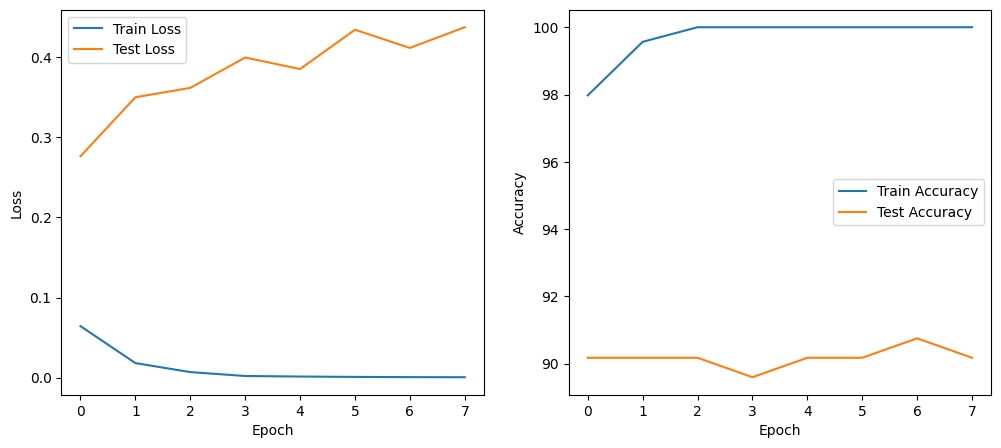

F1 Score: 0.8957


In [103]:
from sklearn.metrics import f1_score
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Evaluation loop
    model.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    predicted_labels = []
    true_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            
            # Collect predicted and true labels for F1 score calculation
            predicted_labels.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    
    test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)
print(f"F1 Score: {f1:.4f}")


In [104]:
def close_images(images):
    for img, _ in images:
        img.close()


close_images(images_correct)
close_images(images_fictitious)
# close_images(images_corr_all)
# close_images(images_fict_all)

In [105]:
percentage = 0.2
images_corr_all = load_images_from_folder(folder_correct, 0, percentage)
percentage = 0.4
images_fict_all = load_images_from_folder(folder_fictitious, 1, percentage)
images_all_test = images_corr_all + images_fict_all
labels_all_test = [label for _, label in images_all_test]
# Show the number of occurrences of class 0 and class 1 in train_labels
num_class_0_train = labels_all_test.count(0)
num_class_1_train = labels_all_test.count(1)


# Print the results
print(f"Number of class 0 in all_labels: {num_class_0_train}")
print(f"Number of class 1 in all_labels: {num_class_1_train}")

image_all_data = CustomDataset(images_all_test, transform=transform)

batch_size = 32
image_all_loader = DataLoader(image_all_data, batch_size=batch_size)

Loading 20.0% of images from class 0
Loading 40.0% of images from class 1
Number of class 0 in all_labels: 904
Number of class 1 in all_labels: 824


In [106]:
from sklearn.metrics import f1_score, precision_score, recall_score

model.eval()
correct = 0
total = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for inputs, labels in image_all_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
precision = precision_score(all_labels, all_predicted, average='macro')
recall = recall_score(all_labels, all_predicted, average='macro')
f1 = 100 * 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Test Accuracy: {accuracy}%")
print(f"F1 Score: {f1}%")

Test Accuracy: 92.5925925925926%
F1 Score: 92.5788009957825%


## ViT

## Kaggle Submission

In [8]:
def load_images_from_folder(folder_path, label, percentage):
    print(f"Loading {percentage * 100}% of images from class {label}")
    images = []
    file_list = os.listdir(folder_path)
    random.shuffle(file_list)
    valid_image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp')  # Add more extensions if needed

    for img in file_list[:int(len(file_list) * percentage)]:
        img_path = os.path.join(folder_path, img)
        # Check if the file has a valid image extension before attempting to open it
        if img.lower().endswith(valid_image_extensions):
            image = Image.open(img_path)
            images.append((image, label))
        else:
            print(f"Ignored non-image file: {img_path}")

    return images


In [17]:
close_images(images_correct)
close_images(images_fictitious)
close_images(images_corr_all)
close_images(images_fict_all)

NameError: name 'images_correct' is not defined

In [9]:
import os
from PIL import Image

folder_correct = 'train/pravilniye(correct)'
folder_fictitious = 'train/fictivniye(fictitious)'
folder_test = 'test'

In [10]:
percentage = 1
images_fictitious = load_images_from_folder(folder_fictitious, 1, percentage)

Loading 100% of images from class 1
Ignored non-image file: train/fictivniye(fictitious)/.DS_Store


In [11]:
percentage = 1
images_correct = load_images_from_folder(folder_correct, 0, percentage)


Loading 100% of images from class 0
Ignored non-image file: train/pravilniye(correct)/.DS_Store


In [12]:
percentage = 1
images_test = load_images_for_testing(folder_test, percentage)

Loading 100% of images from test for testing


In [13]:
images_all = images_correct + images_fictitious

class CustomImageDatasetWithLabels(Dataset):
    def __init__(self, folder_path, label, transform=None):
        self.folder_path = folder_path
        self.image_list = [f for f in os.listdir(self.folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        self.transform = transform
        self.label = label

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.folder_path, self.image_list[idx])
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image, self.label
    
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Change the resize dimensions
    transforms.RandomHorizontalFlip(p=0.5),  # Horizontal flip with 50% probability
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Color jitter
    # transforms.RandomApply([transforms.GaussianBlur(kernel_size=5)], p=0.2),  # Apply Gaussian blur with 20% probability
    # transforms.RandomApply([transforms.ColorJitter(brightness=0.2)], p=0.2),  # Randomly adjust brightness
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Update the mean and standard deviation
])

train_data = CustomDataset(images_all, transform=transform)
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [14]:

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        # Max pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 28 * 28, 128)  # Adjust the input size based on your data and image size
        self.fc2 = nn.Linear(128, 2)  # 2 output classes for binary classification

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        
        x = x.view(-1, 64 * 28 * 28)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model
model = CNNModel()

# Define the loss function (e.g., CrossEntropyLoss) and optimizer (e.g., Adam)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

CNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)

In [31]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision import datasets
import os

# Define an architecture with deeper layers and dropout
class ImprovedCNNModel(nn.Module):
    def __init__(self):
        super(ImprovedCNNModel, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        
        # Max pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(256 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 2)
        
        # Dropout layers
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        
        x = x.view(-1, 256 * 28 * 28)
        x = torch.relu(self.fc1(x))
        
        # Apply dropout
        x = self.dropout1(x)
        
        x = self.fc2(x)
        return x

# Create an instance of the improved model
model = ImprovedCNNModel()

# Define the loss function (e.g., CrossEntropyLoss) and optimizer (e.g., Adam)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


ImprovedCNNModel(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=200704, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
)

In [32]:
# Define the number of training epochs
from tqdm import tqdm
num_epochs = 5

# Training loop
for epoch in tqdm(range(num_epochs), total=num_epochs):
    model.train()  # Set the model to training mode
    
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to the GPU if available
        
        optimizer.zero_grad()  # Zero the gradient buffers
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

 20%|██        | 1/5 [11:40<46:40, 700.18s/it]

Epoch 1, Loss: 0.35062501783871536


 40%|████      | 2/5 [23:20<35:00, 700.24s/it]

Epoch 2, Loss: 0.17211875526541934


 60%|██████    | 3/5 [38:44<26:45, 802.53s/it]

Epoch 3, Loss: 0.14489683873264245


In [23]:
torch.save(model.state_dict(), 'CNN32.pth')

In [24]:
class CustomImageDatasetWithLabels(Dataset):
    def __init__(self, folder_path, label, transform=None):
        self.folder_path = folder_path
        self.image_list = [f for f in os.listdir(self.folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        self.transform = transform
        self.label = label

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.folder_path, self.image_list[idx])
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image, self.label
# Define the paths for the two folders
# folder_correct = 'train/pravilniye(correct)'
# folder_fictitious = 'train/fictivniye(fictitious)'

folder_test = 'test'
# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the custom datasets with labels
dataset_test = CustomImageDatasetWithLabels(folder_test, 0, transform=transform)
# dataset_fictitious = CustomImageDatasetWithLabels(folder_fictitious, 1, transform=transform)

# Combine the datasets
# dataset_all = torch.utils.data.ConcatDataset([dataset_correct, dataset_fictitious])

# Define the data loader
batch_size = 32
# train_loader = torch.utils.data.DataLoader(dataset_all, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

In [25]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import os
from PIL import Image
import csv

# Define a function to predict labels for the test dataset
def predict_labels(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    predictions = []

    for images, _ in test_loader:  # We don't need labels for testing
        images = images.to(device)  # Move data to the GPU if available
        with torch.no_grad():  # Disable gradient computation for inference
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
            predictions.extend(predicted.cpu().numpy())

    return predictions

# Load the pre-trained model (assuming you have saved it)
model.load_state_dict(torch.load('CNN32.pth'))

# Define the device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Predict labels for the test dataset
test_predictions = predict_labels(model, test_loader, device)

# Get the image names for the test dataset
test_image_names = [os.path.splitext(os.path.basename(f))[0] for f in dataset_test.image_list]
output_file = 'test_predictions_3.csv'
# Save the predictions to a text file
with open(output_file, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["file_index", "class"])  # Write column names
    for image_name, prediction in zip(test_image_names, test_predictions):
        writer.writerow([image_name, prediction])


In [12]:
# Load the pre-trained ResNet-101 model and modify it for binary classification
resnet101 = models.resnet101(pretrained=True)

# Freeze all layers except the final classification layer
for param in resnet101.parameters():
    param.requires_grad = False

# Modify the final classification layer for binary classification
num_ftrs = resnet101.fc.in_features
resnet101.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 2)
)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet101.parameters(), lr=0.001)

/Users/tomiriszhaksylyk/miniforge3/envs/tensorflow/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/tomiriszhaksylyk/miniforge3/envs/tensorflow/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [13]:
# Train the model
num_epochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet101.to(device)

for epoch in range(num_epochs):
    resnet101.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet101(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

print("Training complete")


Epoch 1/5, Loss: 0.3469955826774963
Epoch 2/5, Loss: 0.25891772115114825
Epoch 3/5, Loss: 0.228670027468679
Epoch 4/5, Loss: 0.21204860161230402
Epoch 5/5, Loss: 0.21473452579049232
Training complete


In [15]:
torch.save(resnet101.state_dict(), 'ResNet101.pth')


In [16]:
class CustomImageDatasetWithLabels(Dataset):
    def __init__(self, folder_path, label, transform=None):
        self.folder_path = folder_path
        self.image_list = [f for f in os.listdir(self.folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        self.transform = transform
        self.label = label

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.folder_path, self.image_list[idx])
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image, self.label
# Define the paths for the two folders
# folder_correct = 'train/pravilniye(correct)'
# folder_fictitious = 'train/fictivniye(fictitious)'

folder_test = 'test'
# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the custom datasets with labels
dataset_test = CustomImageDatasetWithLabels(folder_test, 0, transform=transform)
# dataset_fictitious = CustomImageDatasetWithLabels(folder_fictitious, 1, transform=transform)

# Combine the datasets
# dataset_all = torch.utils.data.ConcatDataset([dataset_correct, dataset_fictitious])

# Define the data loader
batch_size = 32
# train_loader = torch.utils.data.DataLoader(dataset_all, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=False)



In [18]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import os
from PIL import Image
import csv

# Define a function to predict labels for the test dataset
def predict_labels(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    predictions = []

    for images, _ in test_loader:  # We don't need labels for testing
        images = images.to(device)  # Move data to the GPU if available
        with torch.no_grad():  # Disable gradient computation for inference
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
            predictions.extend(predicted.cpu().numpy())

    return predictions

# Load the pre-trained model (assuming you have saved it)
resnet101.load_state_dict(torch.load('ResNet101.pth'))

# Define the device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Predict labels for the test dataset
test_predictions = predict_labels(resnet101, test_loader, device)

# Get the image names for the test dataset
test_image_names = [os.path.splitext(os.path.basename(f))[0] for f in dataset_test.image_list]
output_file = 'test_predictions_101.csv'
# Save the predictions to a text file
with open(output_file, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["file_index", "class"])  # Write column names
    for image_name, prediction in zip(test_image_names, test_predictions):
        writer.writerow([image_name, prediction])
